## Prédiction des Primes d'Assurances ( Insurance Premium Prediction )

L'objectif de ce projet consiste à examiner les différentes caractéristiques du dataset et observer leur relation en vu tracer
une régression linéaire multiple basée sur plusieurs caractéristiques de l'individu telles que l'âge,
l'état physique / familial et l'emplacement par rapport à ses frais médicaux existants et à utiliser pour prédire
les dépenses médicales futures des personnes qui aident l'assurance médicale à prendre la décision de facturer la prime.

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kurtosis, skew, stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import warnings

In [7]:
data = pd.read_csv("C:/Users/Dell inspiron 13/ML/kaggle/insurance.csv")

In [20]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [22]:
data.shape

(1338, 7)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
#visualisation des donnees manquantes
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [41]:
#coefficients de correlations entre les differentes variables numeriques
corr = data.corr()
corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [46]:
#repartion des femmes et hommes entre les differentes regions
pd.crosstab(data['sex'], data['region'])

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


<AxesSubplot:xlabel='region', ylabel='sex'>

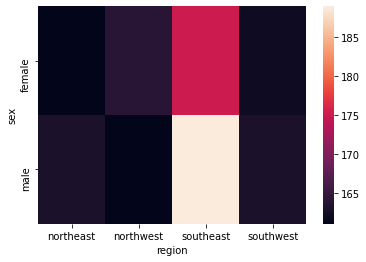

In [77]:
sns.heatmap(pd.crosstab(data['sex'], data['region']), cbar = True)

<AxesSubplot:ylabel='region'>

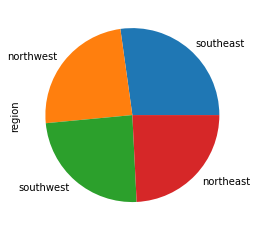

In [64]:
# Sous forme graphique

data.region.value_counts().plot(kind = 'pie')

In [47]:
pd.crosstab(data['sex'], data['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


### 159 hommes et 115  femmes qui fument 
### 274 individus sur 1338 fument

<AxesSubplot:ylabel='smoker'>

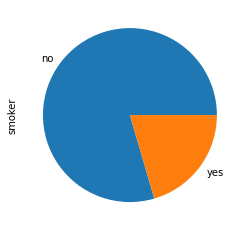

In [80]:
data.smoker.value_counts().plot(kind = 'pie')

In [29]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [30]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [38]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# statistiques descriptives de la variables target (expenses)

In [51]:

print("Summary Statistics of Medical Costs")
print(data['expenses'].describe())
print("skewnes:  {}".format(skew(data['expenses'])))
print("kurtosis:  {}".format(kurtosis(data['expenses'])))

Summary Statistics of Medical Costs
count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64
skewnes:  1.5141797167430497
kurtosis:  1.5958213684180036


##### On constate que la depense maximale est de 63770 euros et celle minimale de 1121 euros. Le coefficient d'applatissement encore appele Kurtosis en anglais est egale a 1.59 superieur a 0 (valeur de la distribution normale), autrement dit cette distribution est plus aplatie que la distribution normale. De meme, le coefficient d'assymetrie (skewness) est inferieur a 3, donc on a une distribution etalee a droite


<AxesSubplot:xlabel='expenses', ylabel='Density'>

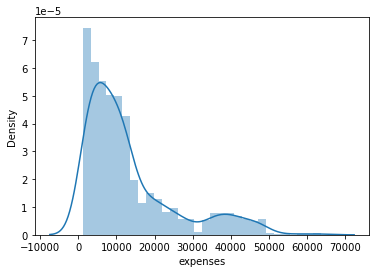

In [59]:
warnings.filterwarnings('ignore')
plt.figure()
sns.distplot(data['expenses'])

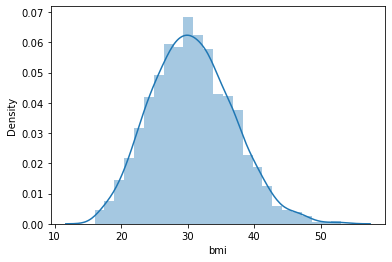

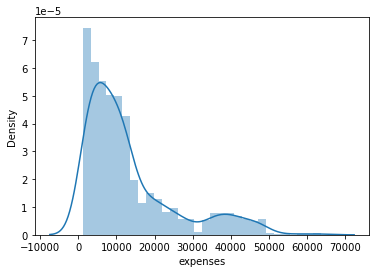

In [60]:
for col in data.select_dtypes('float', 'int'):
    plt.figure()
    sns.distplot(data[col])

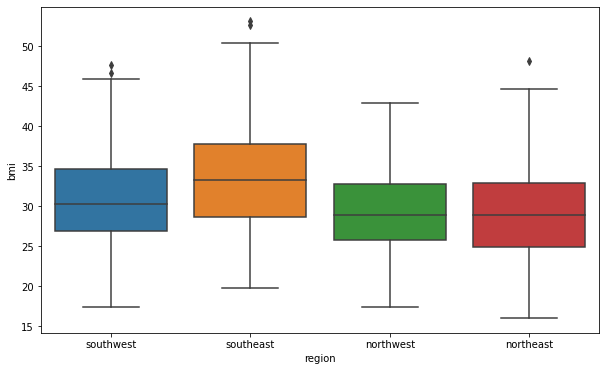

In [74]:
plt.figure(figsize = (10,6))
ax = sns.boxplot(x="region" ,y="bmi", data=data, linewidth=1.5)
plt.show()

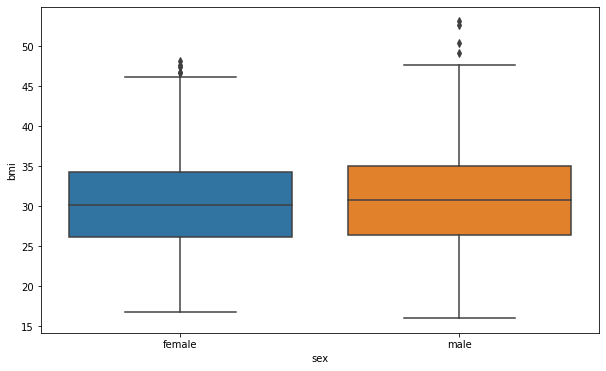

In [75]:
plt.figure(figsize = (10,6))
ax = sns.boxplot(x="sex" ,y="bmi", data=data, linewidth=1.5)
plt.show()

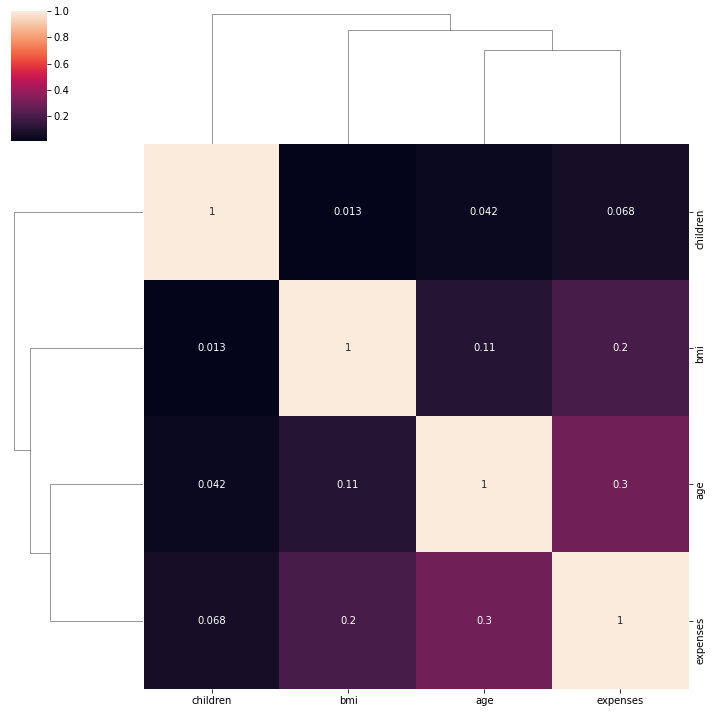

In [88]:
sns.clustermap(data.corr(), annot =True)

Les variables age et expenses sont correlees avec une valeur de correlation de 0.3. De meme il existe une relation entre l'indice de masse corporelle (bmi) et expenses avec une valeur de correlation de 0.2

### Essayons de le visualiser sous une forme graphique en nuage de points

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

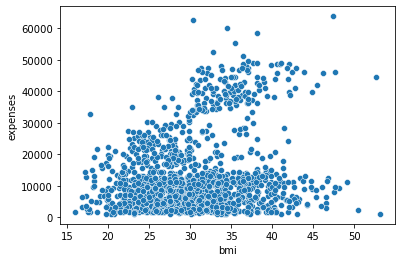

In [90]:
sns.scatterplot(x= data['bmi'], y = data['expenses'])

<AxesSubplot:xlabel='age', ylabel='expenses'>

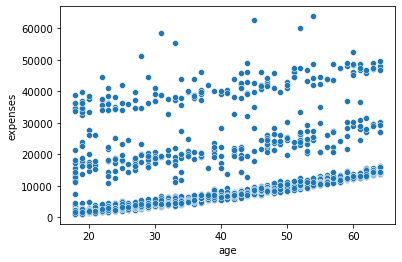

In [93]:
sns.scatterplot(x= data['age'], y = data['expenses'])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

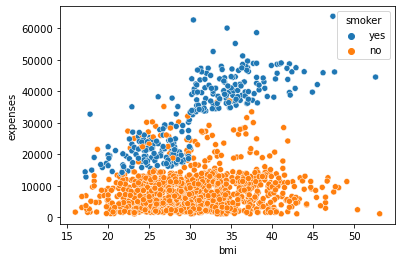

In [94]:
sns.scatterplot(x= data['bmi'], y = data['expenses'], hue = data['smoker'])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

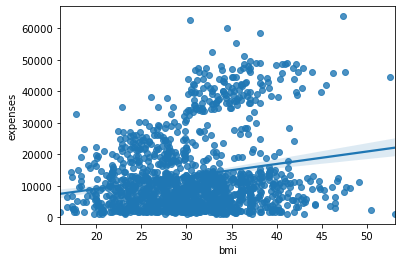

In [96]:
sns.regplot(x= data['bmi'], y = data['expenses'])

In [105]:
cat_data = []
num_data = []

for i,j in enumerate(data.dtypes):
    if j == object:
        cat_data.append(data.iloc[:,i])
    else:
        num_data.append(data.iloc[:,i])


In [106]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [127]:
labelencoder = LabelEncoder()

for i in cat_data:
    cat_data[i] = labelencoder.fit_transform(cat_data[i])


In [134]:
pd.set_option('display.max_rows', 10)

In [135]:
cat_data

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
...,...,...,...
1333,1,0,1
1334,0,0,0
1335,0,0,2
1336,0,0,3


In [142]:
X = num_data.drop(columns = 'expenses')
y = num_data['expenses']

In [155]:
##concatenation des differents datasets
data_concat = pd.concat([cat_data, num_data], axis = 1)
data_concat  = data_concat.drop(columns = 'expenses')
data_concat

,sex,smoker,region,age,bmi,children
0,0,1,3,19.0,27.9,0.0
1,1,0,2,18.0,33.8,1.0
2,1,0,2,28.0,33.0,3.0
3,1,0,1,33.0,22.7,0.0
4,1,0,1,32.0,28.9,0.0
...,...,...,...,...,...,...
1333,1,0,1,50.0,31.0,3.0
1334,0,0,0,18.0,31.9,0.0
1335,0,0,2,18.0,36.9,0.0
1336,0,0,3,21.0,25.8,0.0


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =50)

In [206]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [207]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

### Calcul des differentes metriques

### MAE (Mean Absolute Error)

In [208]:
print("Train :", mean_absolute_error(y_train, train_predict))
print("Test :", mean_absolute_error(y_test, test_predict))

Train : 8923.635075119239
Test : 9164.118049045319


### MSE

In [209]:
print("Train : ",mean_squared_error(y_train,train_predict))
print("Test  : ",mean_squared_error(y_test,test_predict))

Train :  127126081.99359639
Test  :  136994498.18354702


### RMSE

In [210]:
print("Train : ",np.sqrt(mean_squared_error(y_train,train_predict)))
print("Test  : ",np.sqrt(mean_squared_error(y_test,test_predict)))

Train :  11275.0202657732
Test  :  11704.464882409064


### Coefficient de determination

In [211]:
print("Train : ",r2_score(y_train,train_predict))
print("Test  : ",r2_score(y_test,test_predict))

Train :  0.11061318968259026
Test  :  0.1453421978889332
